In [67]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
train_df = pd.read_csv("/Users/fzh/Desktop/code/273/final/sign_mnist_train.csv")
test_df = pd.read_csv("/Users/fzh/Desktop/code/273/final/sign_mnist_test.csv")

In [69]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [70]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [71]:
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

In [72]:
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

In [73]:
# Reshape the images
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [74]:
y_train.shape

(27455,)

<Axes: ylabel='count'>

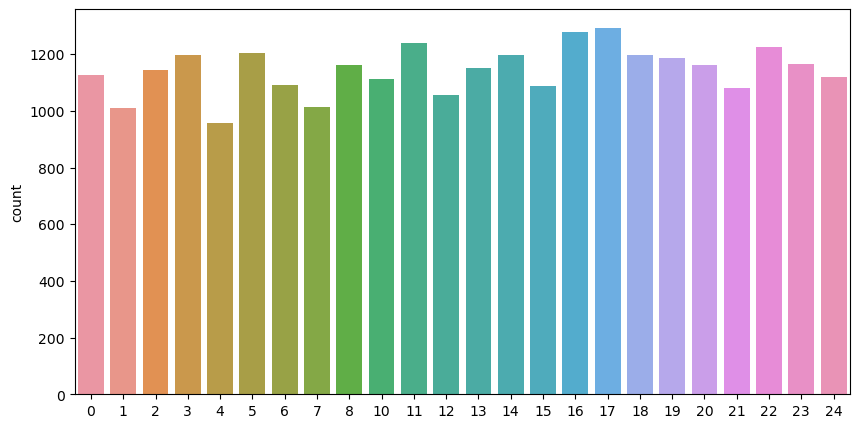

In [75]:
# Plot the distribution of labels in the training set
plt.figure(figsize = (10,5))
sns.countplot(x = y_train)

In [76]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

/Users/fzh/anaconda3/envs/finalenv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# 2 layers CNN

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_142 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_143 (Conv2D)         (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 1600)              0         
                                                                 
 dense_63 (Dense)            (None, 128)             

In [108]:
history = model.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_test, y_test_encoded))

Epoch 1/10
858/858 [==============================] - 7s 8ms/step - loss: 1.2766 - accuracy: 0.6009 - val_loss: 0.4546 - val_accuracy: 0.8578
Epoch 2/10
858/858 [==============================] - 7s 8ms/step - loss: 0.3129 - accuracy: 0.8964 - val_loss: 0.3028 - val_accuracy: 0.9017
Epoch 3/10
858/858 [==============================] - 7s 8ms/step - loss: 0.1508 - accuracy: 0.9503 - val_loss: 0.2721 - val_accuracy: 0.9154
Epoch 4/10
858/858 [==============================] - 7s 8ms/step - loss: 0.0996 - accuracy: 0.9670 - val_loss: 0.3030 - val_accuracy: 0.9180
Epoch 5/10
858/858 [==============================] - 7s 8ms/step - loss: 0.0763 - accuracy: 0.9744 - val_loss: 0.3052 - val_accuracy: 0.9142
Epoch 6/10
858/858 [==============================] - 7s 8ms/step - loss: 0.0607 - accuracy: 0.9797 - val_loss: 0.3329 - val_accuracy: 0.9299
Epoch 7/10
858/858 [==============================] - 7s 8ms/step - loss: 0.0520 - accuracy: 0.9812 - val_loss: 0.2889 - val_accuracy: 0.9131
Epoch 

In [109]:
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

225/225 - 1s - loss: 0.3697 - accuracy: 0.9117 - 555ms/epoch - 2ms/step
Test accuracy: 0.9117401242256165, Test loss: 0.369716078042984


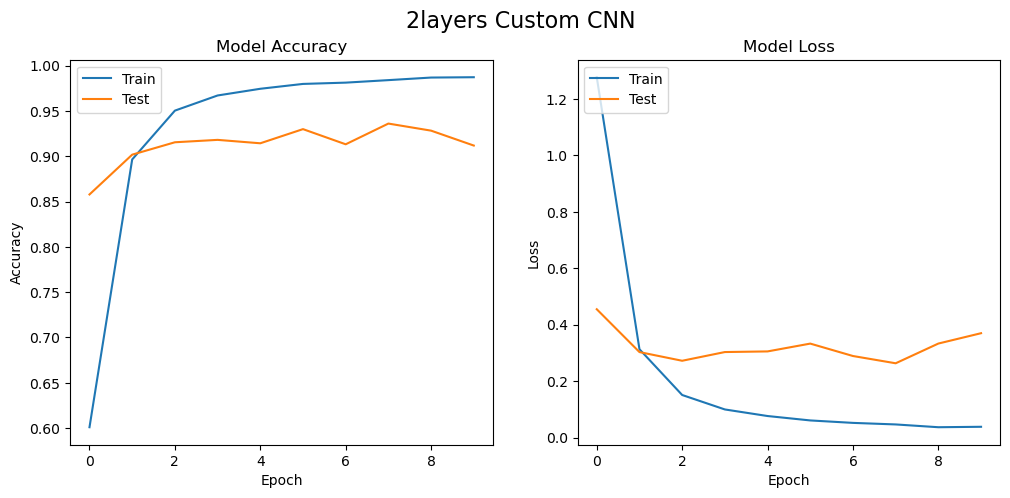

In [157]:
plt.figure(figsize=(12, 5))
plt.suptitle("2layers Custom CNN", fontsize=16)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# LeNet

In [119]:
#le_net

from tensorflow.keras import models, layers
model1 = tf.keras.models.Sequential([
        layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape, padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model1.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_146 (Conv2D)         (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_147 (Conv2D)         (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_23 (Flatten)        (None, 400)               0         
                                                                 
 dense_68 (Dense)            (None, 120)             

In [120]:
history1 = model1.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_test, y_test_encoded))

Epoch 1/10
858/858 [==============================] - 4s 5ms/step - loss: 0.8989 - accuracy: 0.7257 - val_loss: 0.5054 - val_accuracy: 0.8402
Epoch 2/10
858/858 [==============================] - 4s 5ms/step - loss: 0.0647 - accuracy: 0.9865 - val_loss: 0.3733 - val_accuracy: 0.8797
Epoch 3/10
858/858 [==============================] - 4s 5ms/step - loss: 0.0160 - accuracy: 0.9970 - val_loss: 0.3730 - val_accuracy: 0.9063
Epoch 4/10
858/858 [==============================] - 4s 5ms/step - loss: 0.0105 - accuracy: 0.9972 - val_loss: 0.5841 - val_accuracy: 0.8452
Epoch 5/10
858/858 [==============================] - 4s 4ms/step - loss: 0.0174 - accuracy: 0.9953 - val_loss: 0.3904 - val_accuracy: 0.9176
Epoch 6/10
858/858 [==============================] - 4s 4ms/step - loss: 4.2413e-04 - accuracy: 1.0000 - val_loss: 0.4039 - val_accuracy: 0.9191
Epoch 7/10
858/858 [==============================] - 4s 5ms/step - loss: 2.2133e-04 - accuracy: 1.0000 - val_loss: 0.4297 - val_accuracy: 0.916

In [121]:
test_loss, test_acc = model1.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

225/225 - 0s - loss: 0.6824 - accuracy: 0.8650 - 346ms/epoch - 2ms/step
Test accuracy: 0.8650306463241577, Test loss: 0.6823664903640747


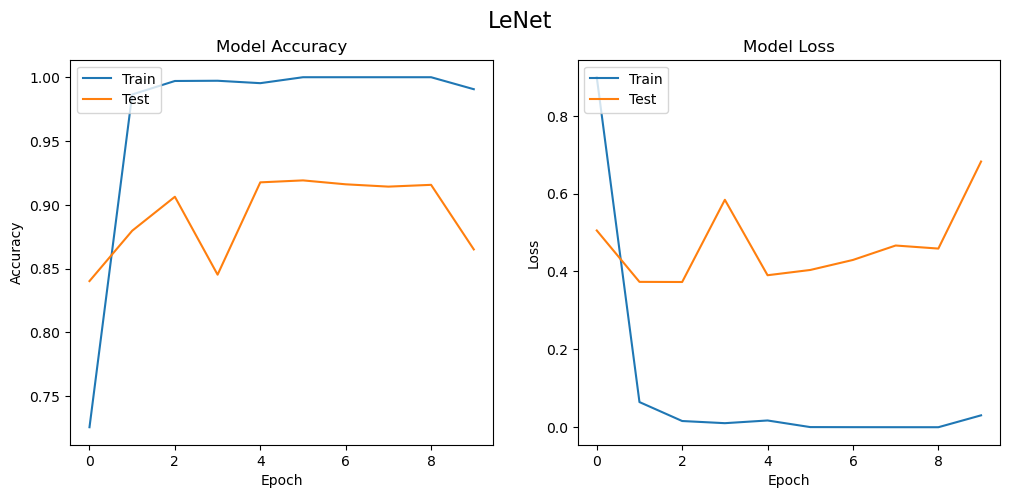

In [156]:
plt.figure(figsize=(12, 5))
plt.suptitle("LeNet", fontsize=16)
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# VGG

In [83]:
# VGG风格模型构建
model2 = tf.keras.models.Sequential([
    # 卷积层 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # 卷积层 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # 卷积层 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # 展平层，准备全连接
    tf.keras.layers.Flatten(),
    
    # 全连接层
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    # 输出层
    tf.keras.layers.Dense(24, activation='softmax')  # 25个单位，对应于24个手势类别和一个不使用的类别
])
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_128 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 conv2d_129 (Conv2D)         (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_130 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 conv2d_131 (Conv2D)         (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                

In [84]:
history2 = model2.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_test, y_test_encoded))

Epoch 1/10
858/858 [==============================] - 27s 30ms/step - loss: 3.1770 - accuracy: 0.0455 - val_loss: 3.1999 - val_accuracy: 0.0201
Epoch 2/10
858/858 [==============================] - 25s 30ms/step - loss: 3.1764 - accuracy: 0.0469 - val_loss: 3.1961 - val_accuracy: 0.0291
Epoch 3/10
858/858 [==============================] - 26s 30ms/step - loss: 3.1760 - accuracy: 0.0457 - val_loss: 3.1977 - val_accuracy: 0.0201
Epoch 4/10
858/858 [==============================] - 25s 29ms/step - loss: 3.1760 - accuracy: 0.0464 - val_loss: 3.1983 - val_accuracy: 0.0201
Epoch 5/10
858/858 [==============================] - 25s 30ms/step - loss: 3.1759 - accuracy: 0.0468 - val_loss: 3.1992 - val_accuracy: 0.0201
Epoch 6/10
858/858 [==============================] - 25s 29ms/step - loss: 3.1759 - accuracy: 0.0461 - val_loss: 3.1994 - val_accuracy: 0.0201
Epoch 7/10
858/858 [==============================] - 25s 30ms/step - loss: 3.1759 - accuracy: 0.0461 - val_loss: 3.1996 - val_accuracy:

In [85]:
test_loss, test_acc = model2.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

225/225 - 2s - loss: 3.2004 - accuracy: 0.0201 - 2s/epoch - 8ms/step
Test accuracy: 0.020078081637620926, Test loss: 3.200432777404785


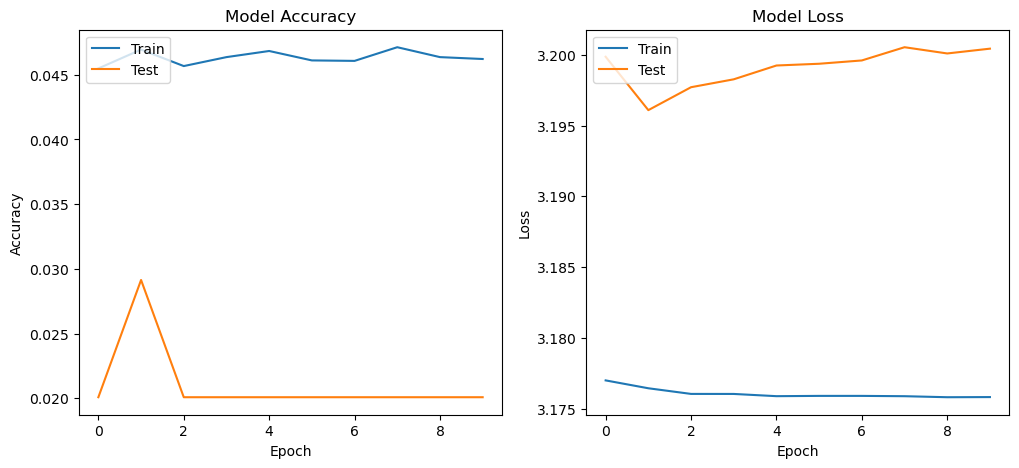

In [93]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [105]:
# VGG风格模型构建
# model3 = tf.keras.models.Sequential([
#     # 第一组卷积和池化层
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
    
#     # 第二组卷积和池化层
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
    
#     # 第三组卷积和池化层
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D((2, 2)),

#     # 展平层
#     tf.keras.layers.Flatten(),

#     # 全连接层
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),

#     # 输出层
#     tf.keras.layers.Dense(24, activation='softmax')
# ])

# model3 = tf.keras.models.Sequential([
#     # 卷积层 1
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
    
#     # 卷积层 2
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
    
#     # 卷积层 3
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D((2, 2)),

#     # 展平层，准备全连接
#     tf.keras.layers.Flatten(),
    
#     # 全连接层
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
    
#     # 输出层
#     tf.keras.layers.Dense(24, activation='softmax')  # 25个单位，对应于24个手势类别和一个不使用的类别
# ])
# model3.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # 模型编译
# # model3.compile(optimizer='adam', 
# #               loss='sparse_categorical_crossentropy', 
# #               metrics=['accuracy'])

# # 打印模型概览
# model3.summary()

In [106]:

# history3 = model3.fit(
#     X_train, y_train_encoded,
#     epochs=10,
#     validation_data=(X_test, y_test_encoded)
# )

In [ ]:
# test_loss, test_acc = model3.evaluate(X_test, y_test_encoded, verbose=2)
# print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

# ResNet

In [147]:
def residual_block(x, filters, reduce_dim=False):
    stride = 1 if not reduce_dim else 2
    y = tf.keras.layers.Conv2D(filters, (3, 3), strides=stride, padding='same')(x)
    y = tf.keras.layers.BatchNormalization()(y)
    y = tf.keras.layers.ReLU()(y)

    y = tf.keras.layers.Conv2D(filters, (3, 3), strides=1, padding='same')(y)
    y = tf.keras.layers.BatchNormalization()(y)

    if reduce_dim:
        x = tf.keras.layers.Conv2D(filters, (1, 1), strides=2, padding='same')(x)

    out = tf.keras.layers.Add()([x, y])
    out = tf.keras.layers.ReLU()(out)
    return out

def build_resnet(input_shape, num_classes):
    inputs = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)

    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, reduce_dim=True)
    x = residual_block(x, 128)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.models.Model(inputs, outputs)
    return model

model4 = build_resnet(input_shape=(28, 28, 1), num_classes=24)

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model4.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_177 (Conv2D)            (None, 14, 14, 64)   3200        ['input_6[0][0]']                
                                                                                                  
 batch_normalization_45 (BatchN  (None, 14, 14, 64)  256         ['conv2d_177[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 re_lu_45 (ReLU)                (None, 14, 14, 64)   0           ['batch_normalization_45[0]

In [148]:
history4 = model4.fit(
    X_train, y_train_encoded,
    epochs=10,
    validation_data=(X_test, y_test_encoded)
)

Epoch 1/10
858/858 [==============================] - 24s 27ms/step - loss: 0.2365 - accuracy: 0.9328 - val_loss: 0.7014 - val_accuracy: 0.7904
Epoch 2/10
858/858 [==============================] - 23s 27ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0783 - val_accuracy: 0.9766
Epoch 3/10
858/858 [==============================] - 23s 27ms/step - loss: 2.0037e-04 - accuracy: 1.0000 - val_loss: 0.0726 - val_accuracy: 0.9794
Epoch 4/10
858/858 [==============================] - 23s 27ms/step - loss: 1.0238e-04 - accuracy: 1.0000 - val_loss: 0.0707 - val_accuracy: 0.9810
Epoch 5/10
858/858 [==============================] - 23s 27ms/step - loss: 5.5970e-05 - accuracy: 1.0000 - val_loss: 0.0748 - val_accuracy: 0.9794
Epoch 6/10
858/858 [==============================] - 23s 26ms/step - loss: 3.4781e-05 - accuracy: 1.0000 - val_loss: 0.0764 - val_accuracy: 0.9795
Epoch 7/10
858/858 [==============================] - 23s 27ms/step - loss: 2.1691e-05 - accuracy: 1.0000 - val_loss: 0.

In [94]:
test_loss, test_acc = model4.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

225/225 - 2s - loss: 3.1743 - accuracy: 0.0485 - 2s/epoch - 8ms/step
Test accuracy: 0.04852202907204628, Test loss: 3.1742615699768066


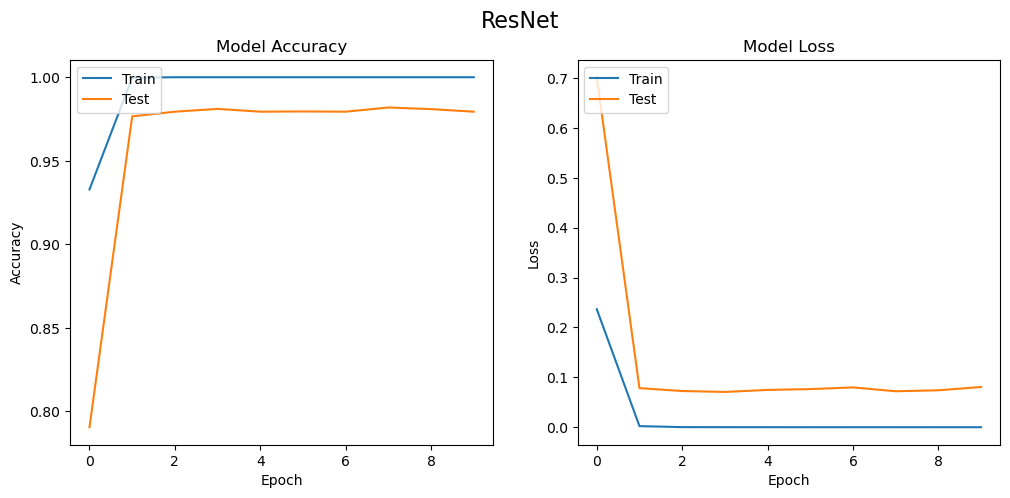

In [158]:
plt.figure(figsize=(12, 5))
plt.suptitle("ResNet", fontsize=16)
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# MobileNetv2

In [104]:
# base_model = tf.keras.applications.MobileNetV2(input_shape=(28, 28, 1),
#                                                include_top=False,
#                                                weights=None)  # 由于输入尺寸较小且是灰度图，不使用预训练权重
# base_model.trainable = True

# model5 = tf.keras.Sequential([
#     base_model,
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(24, activation='softmax')
# ])

# model5.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# history = model5.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_test, y_test_encoded))


In [ ]:
# test_loss, test_acc = model45.evaluate(X_test, y_test_encoded, verbose=2)
# print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

# 3 layers CNN

In [100]:
import tensorflow as tf

model6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    Dropout(0.25), 
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.25), 
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    Dropout(0.5), 
    tf.keras.layers.Dense(24, activation='softmax')
])

model6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model6.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_139 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_140 (Conv2D)         (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 5, 5, 64)        

In [101]:
history6 = model6.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_test, y_test_encoded))

Epoch 1/10
858/858 [==============================] - 9s 10ms/step - loss: 2.2183 - accuracy: 0.3073 - val_loss: 0.7168 - val_accuracy: 0.7832
Epoch 2/10
858/858 [==============================] - 9s 10ms/step - loss: 0.8039 - accuracy: 0.7184 - val_loss: 0.4040 - val_accuracy: 0.8632
Epoch 3/10
858/858 [==============================] - 9s 10ms/step - loss: 0.4938 - accuracy: 0.8263 - val_loss: 0.2754 - val_accuracy: 0.9048
Epoch 4/10
858/858 [==============================] - 9s 10ms/step - loss: 0.3523 - accuracy: 0.8779 - val_loss: 0.2276 - val_accuracy: 0.9169
Epoch 5/10
858/858 [==============================] - 8s 10ms/step - loss: 0.2690 - accuracy: 0.9057 - val_loss: 0.1816 - val_accuracy: 0.9392
Epoch 6/10
858/858 [==============================] - 8s 10ms/step - loss: 0.2072 - accuracy: 0.9293 - val_loss: 0.1483 - val_accuracy: 0.9562
Epoch 7/10
858/858 [==============================] - 9s 10ms/step - loss: 0.1736 - accuracy: 0.9416 - val_loss: 0.1884 - val_accuracy: 0.9511

In [123]:
test_loss, test_acc = model6.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

225/225 - 1s - loss: 0.1327 - accuracy: 0.9642 - 512ms/epoch - 2ms/step
Test accuracy: 0.9641662240028381, Test loss: 0.1326552778482437


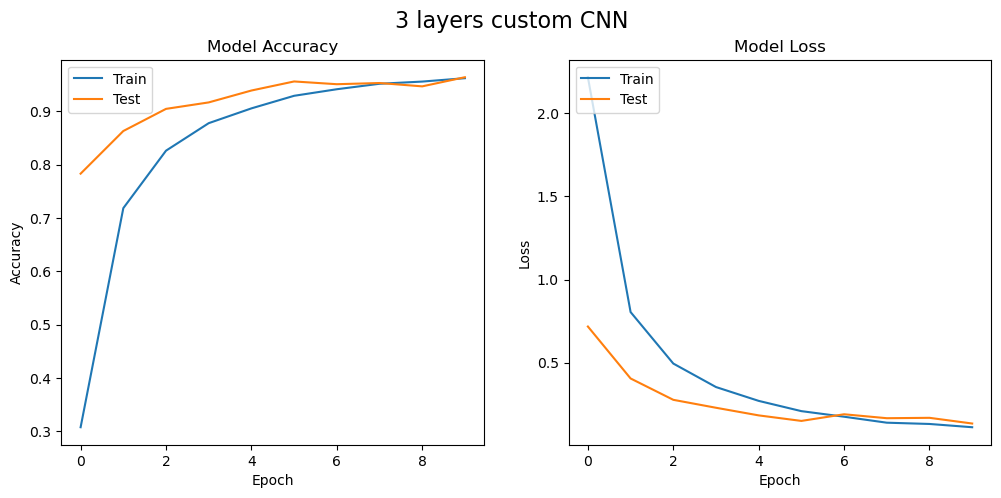

In [159]:
plt.figure(figsize=(12, 5))
plt.suptitle("3 layers custom CNN", fontsize=16)
plt.subplot(1, 2, 1)
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# alexnet

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Simplified AlexNet model
model7 = Sequential([
    Conv2D(96, (3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (5, 5), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='softmax')
])

# Compile the model
model7.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model7.summary()

# Note: Before training the model, make sure X_train, y_train_encoded, X_test, y_test_encoded are prepared accordingly
# history = model.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_test, y_test_encoded))
# test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=2)
# print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_148 (Conv2D)         (None, 26, 26, 96)        960       
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 13, 13, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_149 (Conv2D)         (None, 13, 13, 256)       614656    
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 6, 6, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_150 (Conv2D)         (None, 6, 6, 384)         885120    
                                                                 
 conv2d_151 (Conv2D)         (None, 6, 6, 384)       

In [126]:
history7 = model7.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_test, y_test_encoded))

Epoch 1/10
544/858 [==================>...........] - ETA: 1:16 - loss: 3.1779 - accuracy: 0.0451

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model7.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# cNN（4 conv2d）

In [133]:
model8 = Sequential([
    # 第一个卷积层
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    
    # 第二个卷积层
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # 第三个卷积层
    Conv2D(128, (3, 3), activation='relu'),
    
    # 第四个卷积层
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # 展平层
    Flatten(),
    
    # 全连接层
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    # 输出层
    Dense(24, activation='softmax')
])

# Compile the model
model8.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model8.summary()


ValueError: Exception encountered when calling layer "max_pooling2d_75" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_75/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,1,128].

Call arguments received by layer "max_pooling2d_75" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 128), dtype=float32)

In [129]:
history8 = model.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_test, y_test_encoded))

NameError: name 'model8' is not defined

In [ ]:
test_loss, test_acc = model8.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Data Augmentation

In [135]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=10, 
    width_shift_range=0.1, 
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow(X_train, y_train_encoded, batch_size=32)

# 2 layers CNN after Data augmentation

In [136]:
history10 = model.fit(train_generator, epochs=10, validation_data=(X_test, y_test_encoded))

Epoch 1/10
858/858 [==============================] - 7s 8ms/step - loss: 1.4817 - accuracy: 0.5409 - val_loss: 0.2480 - val_accuracy: 0.9282
Epoch 2/10
858/858 [==============================] - 7s 8ms/step - loss: 0.8947 - accuracy: 0.7050 - val_loss: 0.1890 - val_accuracy: 0.9557
Epoch 3/10
858/858 [==============================] - 7s 8ms/step - loss: 0.7304 - accuracy: 0.7565 - val_loss: 0.1288 - val_accuracy: 0.9600
Epoch 4/10
858/858 [==============================] - 7s 8ms/step - loss: 0.6253 - accuracy: 0.7901 - val_loss: 0.1112 - val_accuracy: 0.9632
Epoch 5/10
858/858 [==============================] - 7s 8ms/step - loss: 0.5546 - accuracy: 0.8086 - val_loss: 0.0904 - val_accuracy: 0.9728
Epoch 6/10
858/858 [==============================] - 7s 8ms/step - loss: 0.5029 - accuracy: 0.8258 - val_loss: 0.0868 - val_accuracy: 0.9723
Epoch 7/10
858/858 [==============================] - 7s 8ms/step - loss: 0.4485 - accuracy: 0.8455 - val_loss: 0.0667 - val_accuracy: 0.9757
Epoch 

In [138]:
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

225/225 - 1s - loss: 0.0374 - accuracy: 0.9929 - 649ms/epoch - 3ms/step
Test accuracy: 0.9928889870643616, Test loss: 0.0373811237514019


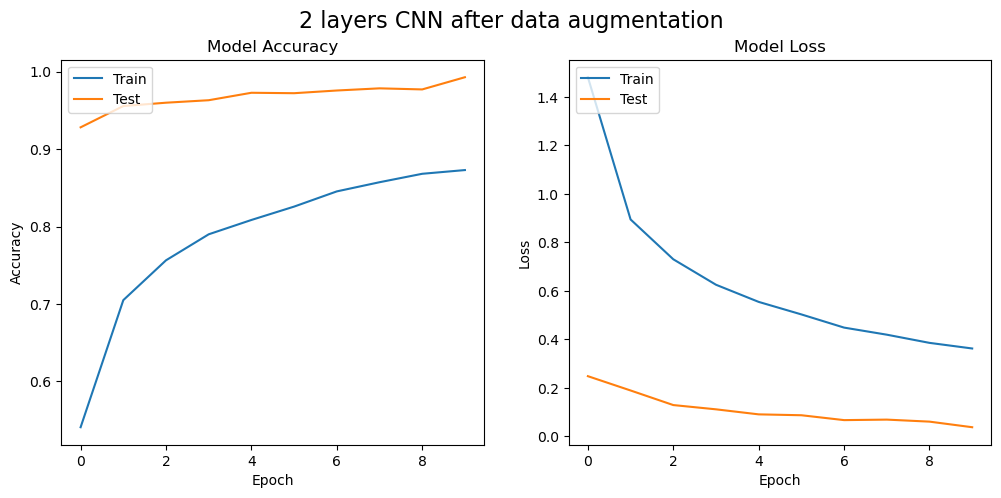

In [161]:
plt.figure(figsize=(12, 5))
plt.suptitle("2 layers CNN after data augmentation", fontsize=16)
plt.subplot(1, 2, 1)
plt.plot(history10.history['accuracy'])
plt.plot(history10.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# LeNet after Data augmentation

In [141]:
history11 = model1.fit(train_generator, epochs=10, validation_data=(X_test, y_test_encoded))

Epoch 1/10
858/858 [==============================] - 5s 5ms/step - loss: 1.0753 - accuracy: 0.6600 - val_loss: 0.2881 - val_accuracy: 0.9099
Epoch 2/10
858/858 [==============================] - 4s 5ms/step - loss: 0.4489 - accuracy: 0.8516 - val_loss: 0.1964 - val_accuracy: 0.9278
Epoch 3/10
858/858 [==============================] - 4s 5ms/step - loss: 0.3097 - accuracy: 0.8983 - val_loss: 0.1088 - val_accuracy: 0.9677
Epoch 4/10
858/858 [==============================] - 4s 5ms/step - loss: 0.2492 - accuracy: 0.9176 - val_loss: 0.1319 - val_accuracy: 0.9562
Epoch 5/10
858/858 [==============================] - 4s 5ms/step - loss: 0.1986 - accuracy: 0.9317 - val_loss: 0.1067 - val_accuracy: 0.9677
Epoch 6/10
858/858 [==============================] - 5s 5ms/step - loss: 0.1765 - accuracy: 0.9406 - val_loss: 0.1274 - val_accuracy: 0.9565
Epoch 7/10
858/858 [==============================] - 5s 5ms/step - loss: 0.1526 - accuracy: 0.9500 - val_loss: 0.0967 - val_accuracy: 0.9685
Epoch 

In [142]:
test_loss, test_acc = model1.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

225/225 - 0s - loss: 0.0328 - accuracy: 0.9883 - 397ms/epoch - 2ms/step
Test accuracy: 0.9882878065109253, Test loss: 0.03275482729077339


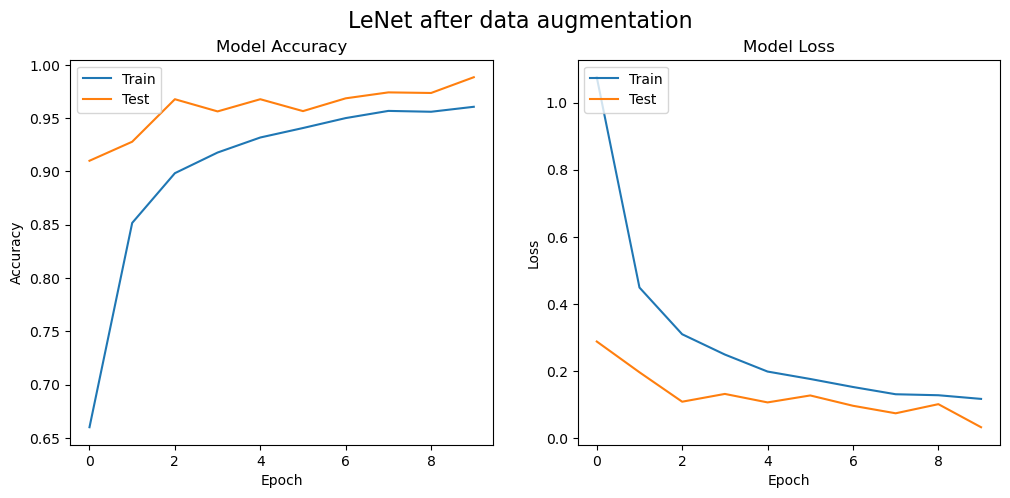

In [163]:
plt.figure(figsize=(12, 5))
plt.suptitle("LeNet after data augmentation", fontsize=16)
plt.subplot(1, 2, 1)
plt.plot(history11.history['accuracy'])
plt.plot(history11.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history11.history['loss'])
plt.plot(history11.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# 3 layers CNN after Data augmentation

In [144]:
history16 = model6.fit(train_generator, epochs=10, validation_data=(X_test, y_test_encoded))

Epoch 1/10
858/858 [==============================] - 9s 10ms/step - loss: 1.5159 - accuracy: 0.5379 - val_loss: 0.2070 - val_accuracy: 0.9564
Epoch 2/10
858/858 [==============================] - 9s 10ms/step - loss: 1.0194 - accuracy: 0.6613 - val_loss: 0.1557 - val_accuracy: 0.9540
Epoch 3/10
858/858 [==============================] - 9s 10ms/step - loss: 0.8355 - accuracy: 0.7171 - val_loss: 0.1439 - val_accuracy: 0.9643
Epoch 4/10
858/858 [==============================] - 9s 10ms/step - loss: 0.7366 - accuracy: 0.7531 - val_loss: 0.1435 - val_accuracy: 0.9481
Epoch 5/10
858/858 [==============================] - 9s 10ms/step - loss: 0.6684 - accuracy: 0.7710 - val_loss: 0.1330 - val_accuracy: 0.9657
Epoch 6/10
858/858 [==============================] - 9s 10ms/step - loss: 0.6161 - accuracy: 0.7904 - val_loss: 0.1376 - val_accuracy: 0.9515
Epoch 7/10
858/858 [==============================] - 9s 10ms/step - loss: 0.5764 - accuracy: 0.8064 - val_loss: 0.1023 - val_accuracy: 0.9692

In [145]:
test_loss, test_acc = model6.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

225/225 - 1s - loss: 0.0817 - accuracy: 0.9748 - 557ms/epoch - 2ms/step
Test accuracy: 0.9747629761695862, Test loss: 0.0817187950015068


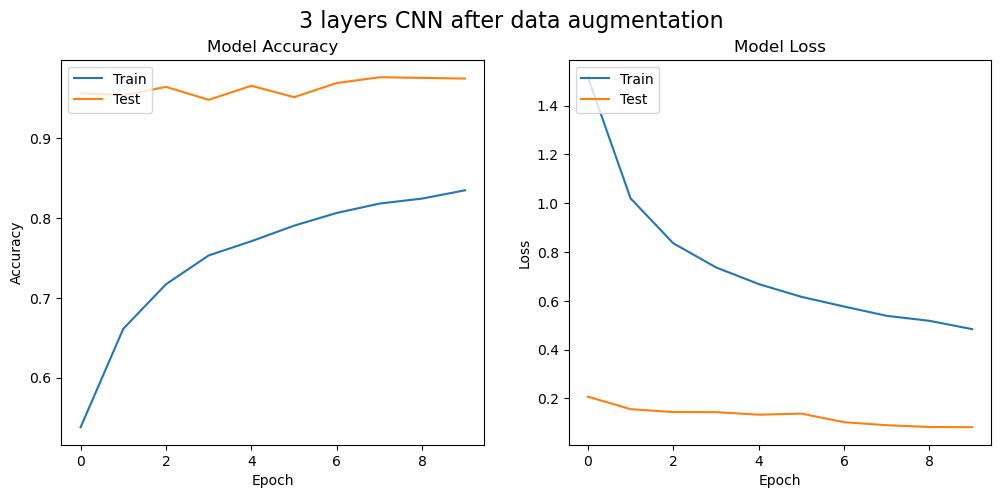

In [162]:
plt.figure(figsize=(12, 5))
plt.suptitle("3 layers CNN after data augmentation", fontsize=16)
plt.subplot(1, 2, 1)
plt.plot(history16.history['accuracy'])
plt.plot(history16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history16.history['loss'])
plt.plot(history16.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# ResNet 

In [149]:
history14 = model4.fit(
    train_generator,
    epochs=10,
    validation_data=(X_test, y_test_encoded)
)

Epoch 1/10
858/858 [==============================] - 23s 26ms/step - loss: 0.7378 - accuracy: 0.7551 - val_loss: 1.2762 - val_accuracy: 0.6400
Epoch 2/10
858/858 [==============================] - 23s 27ms/step - loss: 0.1514 - accuracy: 0.9500 - val_loss: 0.3933 - val_accuracy: 0.8813
Epoch 3/10
858/858 [==============================] - 23s 27ms/step - loss: 0.0866 - accuracy: 0.9727 - val_loss: 0.4209 - val_accuracy: 0.8586
Epoch 4/10
858/858 [==============================] - 22s 25ms/step - loss: 0.0633 - accuracy: 0.9803 - val_loss: 0.0672 - val_accuracy: 0.9764
Epoch 5/10
858/858 [==============================] - 22s 26ms/step - loss: 0.0493 - accuracy: 0.9848 - val_loss: 0.6583 - val_accuracy: 0.8275
Epoch 6/10
858/858 [==============================] - 22s 26ms/step - loss: 0.0443 - accuracy: 0.9852 - val_loss: 0.2377 - val_accuracy: 0.9219
Epoch 7/10
858/858 [==============================] - 22s 25ms/step - loss: 0.0379 - accuracy: 0.9881 - val_loss: 0.3887 - val_accuracy:

In [150]:
test_loss, test_acc = model4.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

225/225 - 2s - loss: 0.4249 - accuracy: 0.8705 - 2s/epoch - 8ms/step
Test accuracy: 0.8704684972763062, Test loss: 0.42486101388931274


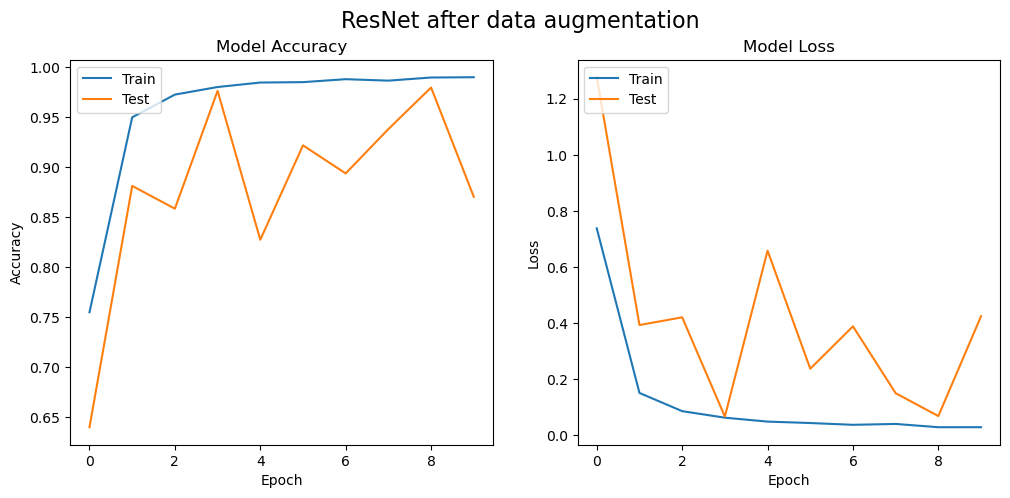

In [164]:
plt.figure(figsize=(12, 5))
plt.suptitle("ResNet after data augmentation", fontsize=16)
plt.subplot(1, 2, 1)
plt.plot(history14.history['accuracy'])
plt.plot(history14.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history14.history['loss'])
plt.plot(history14.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# VGG

In [152]:
history12 = model2.fit(
    train_generator,
    epochs=10,
    validation_data=(X_test, y_test_encoded)
)

Epoch 1/10
858/858 [==============================] - 26s 31ms/step - loss: 3.1758 - accuracy: 0.0471 - val_loss: 3.2005 - val_accuracy: 0.0201
Epoch 2/10
858/858 [==============================] - 26s 31ms/step - loss: 3.1758 - accuracy: 0.0464 - val_loss: 3.2010 - val_accuracy: 0.0201
Epoch 3/10
858/858 [==============================] - 26s 31ms/step - loss: 3.1758 - accuracy: 0.0469 - val_loss: 3.2013 - val_accuracy: 0.0201
Epoch 4/10
858/858 [==============================] - 26s 31ms/step - loss: 3.1758 - accuracy: 0.0468 - val_loss: 3.2014 - val_accuracy: 0.0201
Epoch 5/10
858/858 [==============================] - 27s 31ms/step - loss: 3.1758 - accuracy: 0.0471 - val_loss: 3.2013 - val_accuracy: 0.0201
Epoch 6/10
858/858 [==============================] - 27s 31ms/step - loss: 3.1758 - accuracy: 0.0460 - val_loss: 3.2014 - val_accuracy: 0.0201
Epoch 7/10
858/858 [==============================] - 27s 31ms/step - loss: 3.1758 - accuracy: 0.0449 - val_loss: 3.2019 - val_accuracy:

In [153]:
test_loss, test_acc = model2.evaluate(X_test, y_test_encoded, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

225/225 - 2s - loss: 3.2010 - accuracy: 0.0201 - 2s/epoch - 9ms/step
Test accuracy: 0.020078081637620926, Test loss: 3.201014280319214


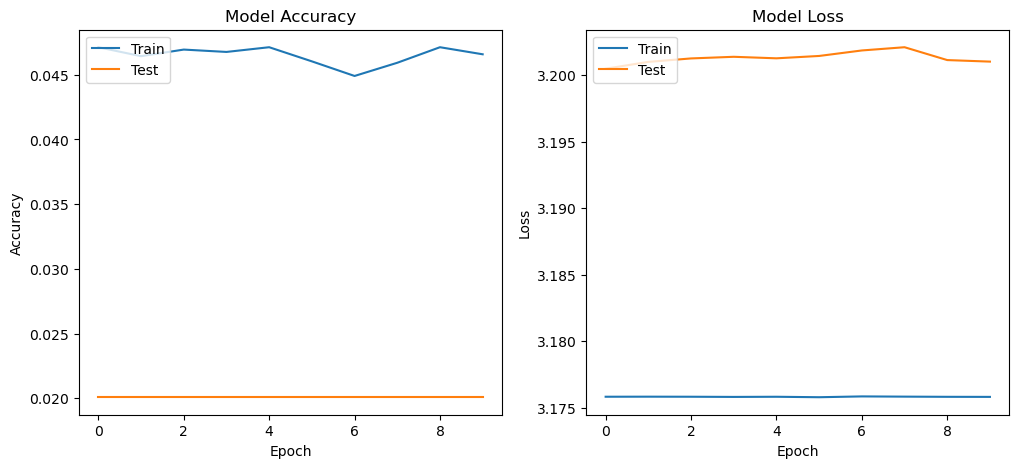

In [154]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history12.history['accuracy'])
plt.plot(history12.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history12.history['loss'])
plt.plot(history12.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()